#### Improving a model

First predictions: baseline predictions
First model: baseline model

From a data perspective:
* Could we collect more data? 
* Could we improve our data? (maybe we have more details about each sample?)

From a model perspective:
* Is there a better model we could use? 
* Could we improve the current model?

Hyperparameters vs. Parameters

* Parameters = The patterns in data that our machine learning finds data parameters
* Hyperparameters = The parameters that you can adjust to (potentially) improve it's ability to find patterns

Three ways to adjust hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhustively with GridSearchCV

In [1]:
# Necessary Imports

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
clf = RandomForestClassifier(n_estimators=100)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### Tuning hyperparameters by hand

Let's make 3 sets, training, validation and test. Hyper parameters get tuned on validation split, test split

We are going to try and adjust

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_preds(y_true, y_preds):
    """Performs evaluation comparisn on y_true labels vs. y_pred labels on a classification"""
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy" : round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 score: {recall:.2f}%")

    return metric_dict

In [4]:
# Reading data

heart_disease = pd.read_csv("data/heart-disease.csv")

In [5]:
# Ignoring warning

import warnings
warnings.filterwarnings('ignore')

In [6]:
np.random.seed(42)

heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & y

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

# Split the data into train, validation & test sets

train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)


clf = RandomForestClassifier()
clf.fit(X_train, y_train)


# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 0.81%
Recall: 0.88%
F1 score: 0.88%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [7]:
np.random.seed(42)

clf_2 = RandomForestClassifier(n_estimators=10)
clf_2.fit(X_train, y_train)


# Make baseline predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the classifier on validation set
clf_2_metrics = evaluate_preds(y_valid, y_preds)
clf_2_metrics

Acc: 82.22%
Precision: 0.81%
Recall: 0.88%
F1 score: 0.88%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [8]:
np.random.seed(42)

clf_3 = RandomForestClassifier(max_depth=10)
clf_3.fit(X_train, y_train)


# Make baseline predictions
y_preds_3 = clf_3.predict(X_valid)

# Evaluate the classifier on validation set
clf_3_metrics = evaluate_preds(y_valid, y_preds)
clf_3_metrics

Acc: 82.22%
Precision: 0.81%
Recall: 0.88%
F1 score: 0.88%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

NOTE: 
* Training set = course materials
* Validation set = Practice Exam
* Test set = Final exam

#### Hyperparameter tuning with RandomizedSearchCV

In [9]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
       "max_depth" : [None, 5, 10, 20, 30],
        "max_features": ["auto","sqrt"],
        "min_samples_split": [2,4,6],
        "min_samples_leaf": [1,2,4] 
       }


np.random.seed(42)


# Split into X, y

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)
# n_jobs how much processor you'd like to use

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=2)


rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.7s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [10]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [11]:
# predict uses the best settings it found in the last test

rs_y_preds = rs_clf.predict(X_test)

# Evaluate

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77%
Recall: 0.86%
F1 score: 0.86%


#### Hyperparameter tuning with GridSearchCV

In [12]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [13]:
# GridSearchCV does not have iter=#. It takes a brute search approach

grid_2 = {'n_estimators': [100, 200, 500],
     'max_depth': [None],
     'max_features': ['auto', 'sqrt'],
     'min_samples_split': [6],
     'min_samples_leaf': [1, 2]}

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Split into X, y

X = heart_disease_shuffled.drop("target", axis = 1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)
# n_jobs how much processor you'd like to use

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf, param_grid=grid_2, cv=5, verbose=2)

gs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [15]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [16]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74%
Recall: 0.82%
F1 score: 0.82%


**Let's compare our diffent models metrics.**

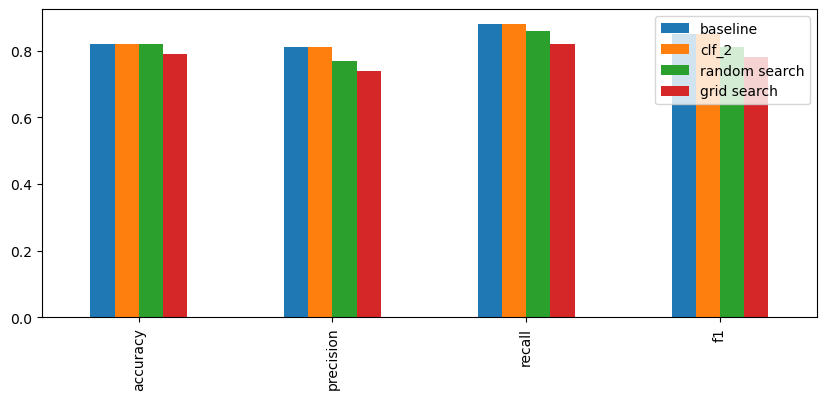

In [17]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics, "clf_2": clf_2_metrics,
"random search": rs_metrics,
 "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10, 4));

#### Export and import trained model

Two ways
1. Python's `pickle` module
2. using `joblib` module


**Pickle**


In [18]:
import pickle 

# save to a file
pickle.dump(gs_clf, open("gs_random_forest_1.pkl", "wb"))

In [19]:
# load a picle file
loaded_pickle_model = pickle.load(open("gs_random_forest_1.pkl", "rb"))

In [20]:
loaded_pickle_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

**JobLib**

In [21]:
from joblib import dump, load

dump(gs_clf, filename="gs_random_forest_1.joblib")

['gs_random_forest_1.joblib']

In [22]:
loaded_joblib_model = load(filename="gs_random_forest_1.joblib")

In [23]:
loaded_joblib_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

When a model consists of large numpy arrays Joblib's `dump` and `load` might be more effient